<a href="https://colab.research.google.com/github/janNIEL-espi/Laboratory/blob/main/lab2_titanic_ESPINOSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib

In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()  # Display the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df["Age"].fillna(df["Age"].median(), inplace=True)

<ipython-input-9-eebe32542ec7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [8]:
df["Age"].isnull().sum()

0

In [11]:
df.drop(columns=["Cabin"], inplace=True)

KeyError: "['Cabin'] not found in axis"

In [12]:
# Check if 'Cabin' is gone
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [14]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [17]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [18]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [21]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

In [23]:
df.columns = df.columns.str.lower()

In [24]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [26]:
# Save the cleaned dataset to a new file
df.to_csv("titanic_cleaned.csv", index=False)

In [28]:
# Import Matplotlib for creating visualizations
import matplotlib.pyplot as plt

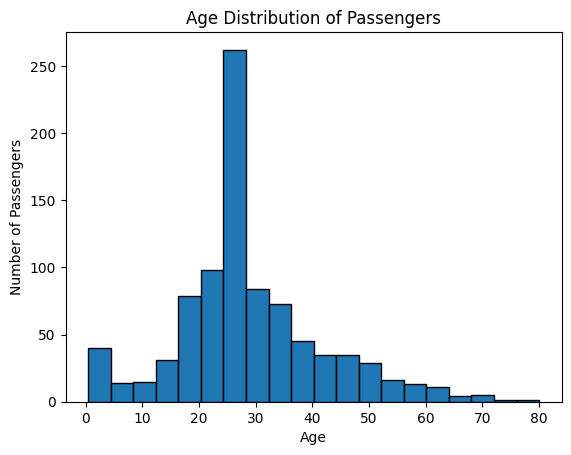

In [29]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")


plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")


plt.show()

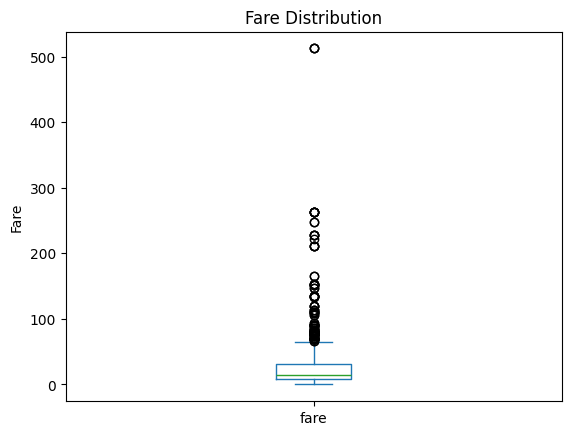

In [30]:
df["fare"].plot(kind="box")

plt.title("Fare Distribution")
plt.ylabel("Fare")

plt.show()

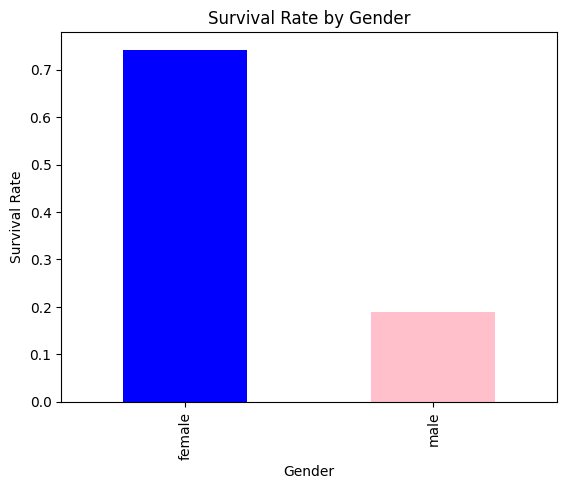

In [33]:
# Convert 'Survived' to numeric temporarily for the calculation
df["survived"] = pd.to_numeric(df["survived"], errors="coerce")

# Group by 'Sex' and calculate the average survival rate
df.groupby("sex")["survived"].mean().plot(kind="bar", color=["blue", "pink"])

# Add a title and labels
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")

# Show the chart
plt.show()


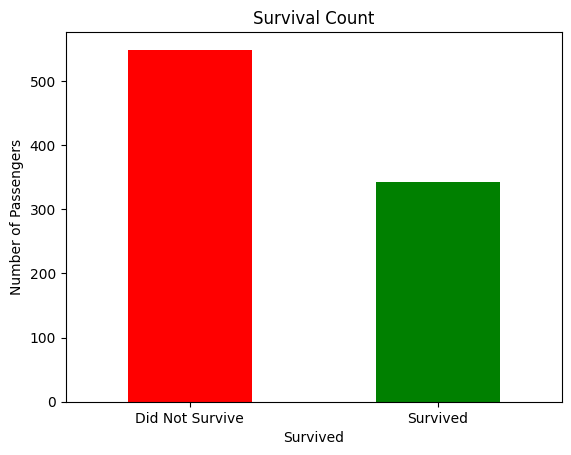

In [34]:
df["survived"].value_counts().plot(kind="bar", color=["red", "green"])

plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.xticks(ticks=[0, 1], labels=["Did Not Survive", "Survived"], rotation=0)

plt.show()


# **Laboratory Exercise: Titanic Dataset Analysis**

---

## **Answers to Questions**

---

### **1. What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?**

#### **Steps in Cleaning the Dataset:**
1. **Handle Missing Values:**
   - Filled missing values in the `Age` column with the median.
     - **Reason:** The median is less affected by extreme values (outliers) and provides a reliable central tendency for numerical data.
   - Dropped the `Cabin` column.
     - **Reason:** This column had too many missing values, making it impractical to impute or analyze.

2. **Remove Duplicates:**
   - Identified and removed duplicate rows in the dataset.
     - **Reason:** Duplicate data can distort analysis and visualizations, so it is essential to ensure each record is unique.

3. **Fix Data Types:**
   - Converted the `Survived` and `Pclass` columns to categorical types.
     - **Reason:** These columns represent categories (e.g., survived/did not survive), and using the correct data type ensures accurate grouping and analysis.

4. **Standardize Column Names:**
   - Converted all column names to lowercase.
     - **Reason:** This ensures consistency and avoids potential errors due to case sensitivity during analysis.

5. **Save the Cleaned Dataset:**
   - Saved the cleaned data to a new file (`titanic_cleaned.csv`).
     - **Reason:** This allows us to reuse the cleaned data in future analyses without redoing the cleaning process.

#### **Why These Steps and Algorithms?**
- **Missing Values:** Filling with the median maintains the dataset's structure without introducing bias.
- **Duplicate Removal:** Ensures data integrity and avoids inflating metrics during analysis.
- **Categorical Conversion:** Helps optimize memory usage and simplifies grouping operations.
- **Standardization:** Ensures consistency when referencing column names in code.

---

### **2. Create at least two (2) basic data analyses on two (2) columns in the dataset.**

---

#### **Analysis 1: Survival Count**
- **Visualization:**
   - A bar chart was created to show the number of passengers who survived (`1`) and those who didn’t (`0`).
   ```python
   df["survived"].value_counts().plot(kind="bar", color=["red", "green"])
   plt.title("Survival Count")
   plt.xlabel("Survived")
   plt.ylabel("Number of Passengers")
   plt.xticks(ticks=[0, 1], labels=["Did Not Survive", "Survived"], rotation=0)
   plt.show()

- **Insight - The majority of passengers did not survive, indicating a higher fatality rate during the Titanic disaster.**

#### **Analysis 2: Survival Rate by Gender**

- **Visualization:**
   A bar chart was created to show the average survival rate for males and females.

   ```python
   df["survived"] = pd.to_numeric(df["survived"], errors="coerce")
   df.groupby("sex")["survived"].mean().plot(kind="bar", color=["blue", "pink"])
   plt.title("Survival Rate by Gender")
   plt.ylabel("Survival Rate")
   plt.xlabel("Gender")
   plt.show()

- **Insight - Females had a significantly higher survival rate than males. This supports historical accounts that "women and children were prioritized" during the evacuation.**

### **Citation**

This analysis was assisted by ChatGPT, an AI language model developed by OpenAI. Below is the citation in APA 7th edition format:

OpenAI. (2025). *ChatGPT (March 16 Version)* [Language model]. Retrieved from https://openai.com/chatgpt